<a href="https://colab.research.google.com/github/AstridSerruto/Projects/blob/master/Customer%20Segmentation/Marketing_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Marketing Segmentation

Astrid Serruto

November 2020

Dataset: https://www.kaggle.com/arjunbhasin/credit-card-dataset?select=credit_data_norm.csv


Clustering is an effective technique used to find logical groupings in data. For this project I will explore at length the k-means clustering approach in an effort to identify customer segments in credit card data. I will then use the Agglomerative & BIRCH  clustering approaches to compare their treatment of the data with the k-means. 

Dataset was obtained from Kaggle.com, arjunbhasin

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn.preprocessing as pp
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score
import seaborn as sns
import scipy.cluster.hierarchy as shc
import nbformat
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
creditcard_df = pd.read_csv('/content/drive/My Drive/marketing_data.csv')

In [ ]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Data Dictionary
Following is the Data Dictionary for Credit Card dataset :-

CUSTID : Identification of Credit Card holder (Categorical)

BALANCE: Balance amount left in their account to make purchases (

BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFFPURCHASES: Maximum purchase amount done in one-go

INSTALLMENTSPURCHASES : Amount of purchase done in installment

CASHADVANCE: Cash in advance given by the user

PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASESTRX: Numbe of purchase transactions made

CREDITLIMIT: Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

In [ ]:
creditcard_df.shape

(8950, 18)

In [ ]:
creditcard_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA


Let's apply describe() and get more statistical insights on our dataframe

In [ ]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Mean balance is $1564 

Purchases average is $1000

one off purchase average is ~$600

Average credit limit ~ 4500

Percent of full payment is 15%

Average tenure is 11 years

In [ ]:
#Who made max "ONEOFF_Purchases"?
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


The data contained 314 null values that were imputed with mean values from their respective columns. MIMIMUM_PAYMENTS had 313 null values and CREDIT_LIMIT had 1.

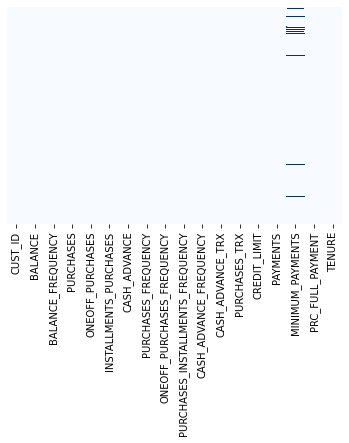

In [ ]:
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
#Fill missing values with the mean
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [ ]:
#Verefy values have been filled
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
#Check for Duplicates in data
creditcard_df.duplicated().sum()

0

For this analysis I chose to use all of the features minus the CUST_ID feature. The CUST_ID is specific to an individual and does not help with this analysis. 

In [ ]:
#Dropping 'CUST_ID' column
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)
creditcard_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


The feature engineering section will focus on outliers since many of the columns in our dataset have outliers. The good thing is that we have different groups of columns with similar data types and even ranges, which means that binning these columns can help us cluster the data.

In [ ]:
#What are our columns
creditcard_df.columns


Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

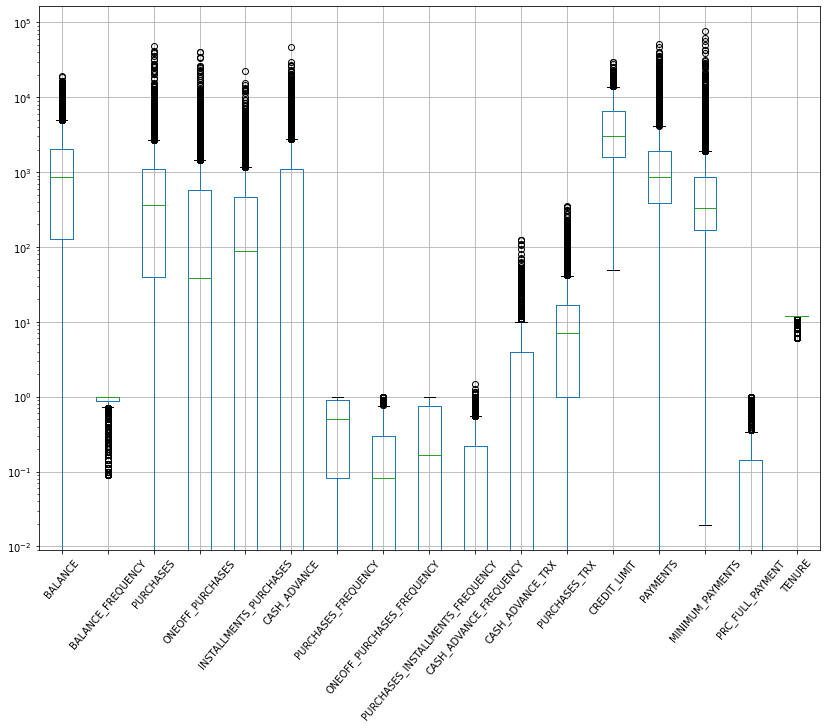

In [ ]:
plt.subplots(figsize=(14, 10))
creditcard_df.boxplot()
plt.yscale('log')
plt.xticks(rotation=50)
plt.show()

In [ ]:
# The first group: with individual US dollars as units
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

range_min = [0,500,1000,3000,5000]
range_max = [500,1000,3000,5000,10000]
for col in columns:
    bin_col=col+'_BIN'
    creditcard_df[bin_col]=0
    for i in range(5):
        creditcard_df.loc[((creditcard_df[col]>range_min[i])&(creditcard_df[col]<=range_max[i])),bin_col]=i+1
    creditcard_df.loc[((creditcard_df[col]>10000)),bin_col]=6

data = creditcard_df.drop(columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS'])    

# The second group: with frequencies between 0 and 1 as units
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for col in columns:
    bin_col=col+'_BIN'
    data[bin_col]=0
    for i in range(0,10):
        i = i/10
        data.loc[((data[col]>i)&(data[col]<=i+0.1)),bin_col]=int((i+0.1)*10)

data = data.drop(columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT'])
        
# The 3rd group: with number of transactions as units
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  
for col in columns:
    bin_col=col+'_BIN'
    data[bin_col]=0
    for i in range(0,25,5):
        data.loc[((data[col]>i)&(data[col]<=i+5)),bin_col]=int((i/5)+1)    
    data.loc[((data[col]>25)&(data[col]<=50)),bin_col]=6
    data.loc[((data[col]>50)&(data[col]<=100)),bin_col]=7
    data.loc[((data[col]>100)),bin_col]=8
data = data.drop(columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX'])

In [ ]:
# Standardize data
scaler = pp.StandardScaler() 
scaled_df = scaler.fit_transform(creditcard_df) 
  
# Normalizing the Data 
normalized_df = pp.normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 

normalized_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8.950000e+03,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,-0.029338,0.008741,-0.032309,-0.026922,-0.026925,-0.029133,-0.013656,-0.021510,-0.011739,-0.021705,-0.024610,-0.030008,-0.035889,-0.036452,-2.254801e-02,-0.018841,0.017324,-0.017862,-0.025107,-0.021452,-0.020215,-0.021547,-0.028732,-0.032853,-0.027951
std,0.184075,0.236105,0.119574,0.116006,0.140052,0.158120,0.247577,0.219245,0.248461,0.211427,0.163353,0.154314,0.209408,0.134881,1.078866e-01,0.222411,0.205341,0.225914,0.214501,0.216254,0.217020,0.225717,0.234183,0.219834,0.213727
min,-0.309140,-0.814870,-0.222778,-0.186913,-0.212985,-0.251339,-0.435753,-0.355390,-0.414889,-0.343661,-0.242255,-0.246285,-0.482414,-0.235382,-1.965675e-01,-0.317434,-0.858460,-0.472190,-0.411208,-0.420080,-0.394262,-0.400288,-0.706995,-0.704950,-0.450892
25%,-0.163875,0.009345,-0.113800,-0.098247,-0.119070,-0.128638,-0.242651,-0.175455,-0.227997,-0.176254,-0.125660,-0.136026,-0.203817,-0.127807,-7.885028e-02,-0.153893,0.057886,-0.233375,-0.165066,-0.205957,-0.212086,-0.205297,-0.202497,-0.241207,-0.193882
50%,-0.086050,0.106657,-0.073216,-0.070373,-0.077410,-0.093097,0.004771,-0.114622,-0.099953,-0.095861,-0.088440,-0.074968,-0.089461,-0.079081,-5.510080e-02,-0.106997,0.088191,-0.051948,-0.096858,-0.005985,0.011047,-0.090526,-0.106175,-0.063317,-0.137632
75%,0.057756,0.152273,0.011812,-0.002116,0.016207,0.016124,0.220099,0.066122,0.212514,0.080534,0.026605,0.023189,0.110124,0.012851,-1.113688e-16,-0.010676,0.109799,0.168911,0.176160,0.146858,0.022610,0.188462,0.183112,0.137917,0.107494
max,0.701919,0.312924,0.572889,0.688365,0.875357,0.756870,0.513286,0.729240,0.578043,0.799484,0.954546,0.909408,0.804681,0.874561,9.709210e-01,0.791283,0.239675,0.531444,0.496217,0.608077,0.612365,0.671027,0.562171,0.620457,0.765459


For K-Means clustering, the algorithm works best with variables with normalized data with the same variance and standard deviations. As an initial check, I investigated the skewness of a subset of my variables. I found that most (if not all) of the features not normalized between 0 and 1 are skewed.

Based on my analysis of skewness, I then log-transformed the data. I then evaluated the mean and standard deviations of my data. The data showed that I still needed to center my data. To center my data, I used klearn.preprocessing.StandardScaler on my data. This process has the effect of subtracting the mean values from each observation in each feature.

The final step was to normalize my data. Normalizing my data had the impact of keeping my means and std the uniform across the data set but scales my data to have unit norm.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

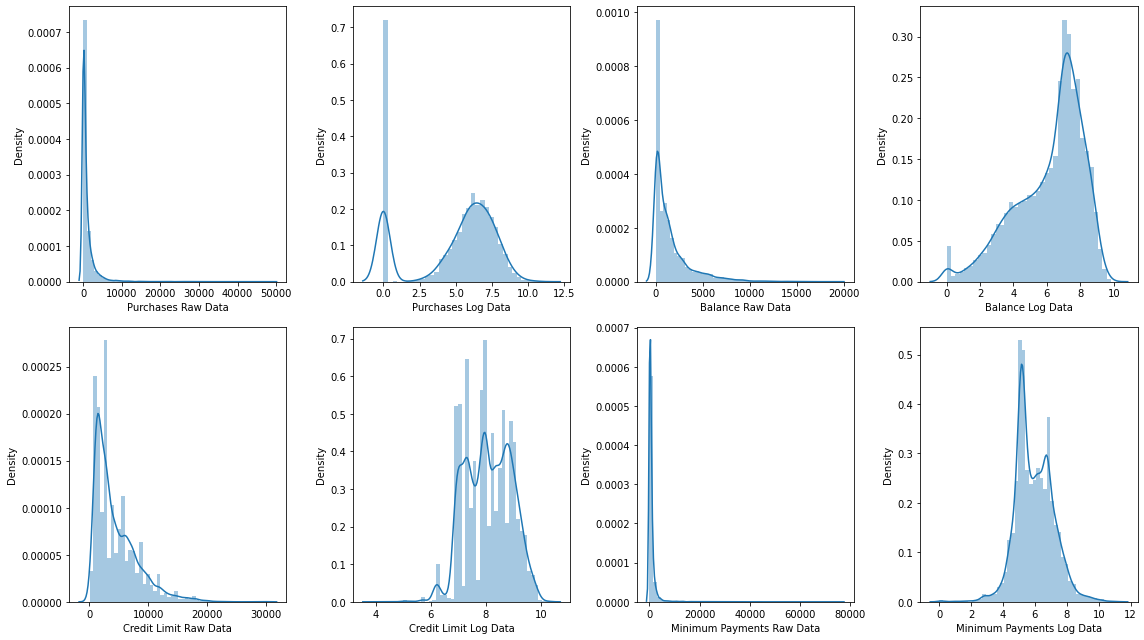

In [ ]:
figure = plt.figure(figsize=(16, 9))
raw_PURCHASES = figure.add_subplot(2,4,1) 
log_PURCHASES = figure.add_subplot(2,4,2) #silhouette bar chart
raw_BALANCE = figure.add_subplot(2,4,3) #silhouette bar chart
log_BALANCE = figure.add_subplot(2,4,4) #silhouette bar chart
raw_CREDIT_LIMIT = figure.add_subplot(2,4,5) #silhouette bar chart
log_CREDIT_LIMIT = figure.add_subplot(2,4,6) #silhouette bar chart
raw_MINIMUM_PAYMENTS = figure.add_subplot(2,4,7) #silhouette bar chart
log_MINIMUM_PAYMENTS = figure.add_subplot(2,4,8) #silhouette bar chart

sns.distplot(creditcard_df['PURCHASES'], axlabel='Purchases Raw Data', ax=raw_PURCHASES)

purchases_log=np.log(1 + creditcard_df['PURCHASES'])
sns.distplot(purchases_log, axlabel='Purchases Log Data', ax=log_PURCHASES)

sns.distplot(creditcard_df['BALANCE'], axlabel='Balance Raw Data', ax=raw_BALANCE)

purchases_log=np.log(1 + creditcard_df['BALANCE'])
sns.distplot(purchases_log, axlabel='Balance Log Data', ax=log_BALANCE)

sns.distplot(creditcard_df['CREDIT_LIMIT'], axlabel='Credit Limit Raw Data', ax=raw_CREDIT_LIMIT)

purchases_log=np.log(1 + creditcard_df['CREDIT_LIMIT'])
sns.distplot(purchases_log, axlabel='Credit Limit Log Data', ax=log_CREDIT_LIMIT)

sns.distplot(creditcard_df['MINIMUM_PAYMENTS'], axlabel='Minimum Payments Raw Data', ax=raw_MINIMUM_PAYMENTS)

purchases_log=np.log(1 + creditcard_df['MINIMUM_PAYMENTS'])
sns.distplot(purchases_log, axlabel='Minimum Payments Log Data', ax=log_MINIMUM_PAYMENTS)

figure.tight_layout()

Clustering Approaches

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including machine learning, pattern recognition, image analysis, information retrieval, bioinformatics, data compression, and computer graphics.

For this data set and this analysis, we are attempting to cluster credit card data to identify customer segments based on their credit card transaction history.

The first approach in attempting to cluster the data is the K-Means clustering approach complete with an interpretation of the data clusters. Following that analysis is a general comparison of how the K Means, Birch, and Agglomerative clustering approaches differ in their treatment of the data.

k-means is one of the simplest unsupervised learning algorithms that solves clustering problems. The procedure follows a simple and easy way to classify a given data set through a certain number of clusters (assume k clusters). The main idea is to define k centers, one for each cluster.

The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data and to find patterns and make better decisions. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the most relevant group.

Find optimal number of clusters using Elbow method

The Elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset. 

Text(0, 0.5, 'Silhouette Score')

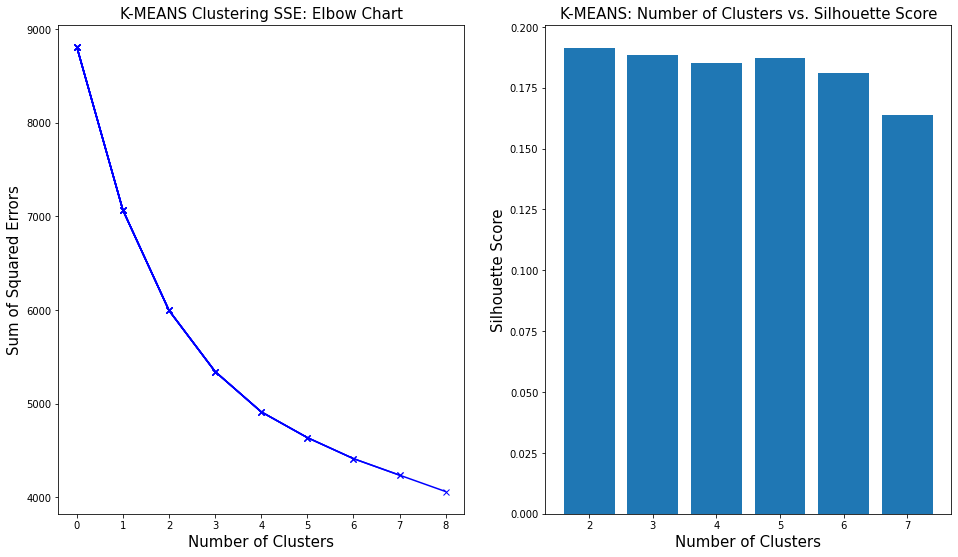

In [ ]:
figure = plt.figure(figsize=(16, 9))
elbow = figure.add_subplot(1,2,1) #elbow chart
kmean_sil = figure.add_subplot(1,2,2) #silhouette bar chart

n_clusters=10
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(normalized_df)
    cost.append(kmean.inertia_) 
    elbow.set_ylabel('Sum of Squared Errors', fontsize = 15)
    elbow.set_xlabel('Number of Clusters', fontsize = 15)
    elbow.set_title('K-MEANS Clustering SSE: Elbow Chart', fontsize = 15)
    elbow.plot(cost, 'bx-')


silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(normalized_df, KMeans(n_clusters = n_cluster).fit_predict(normalized_df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
kmean_sil.bar(k, silhouette_scores) 
kmean_sil.set_title('K-MEANS: Number of Clusters vs. Silhouette Score', fontsize = 15)
kmean_sil.set_xlabel('Number of Clusters', fontsize = 15) 
kmean_sil.set_ylabel('Silhouette Score', fontsize = 15)

The elbow chart appears to recommend somewhere between 3 and 5 potential clusters. The silhouette score for 2 clusters is the highest with the rest of the scores from 3 to 7 clusters being very close to equal.

In [ ]:
kmean= KMeans(3)
kmean.fit(normalized_df)
labels=kmean.labels_
clusters=pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis=1)

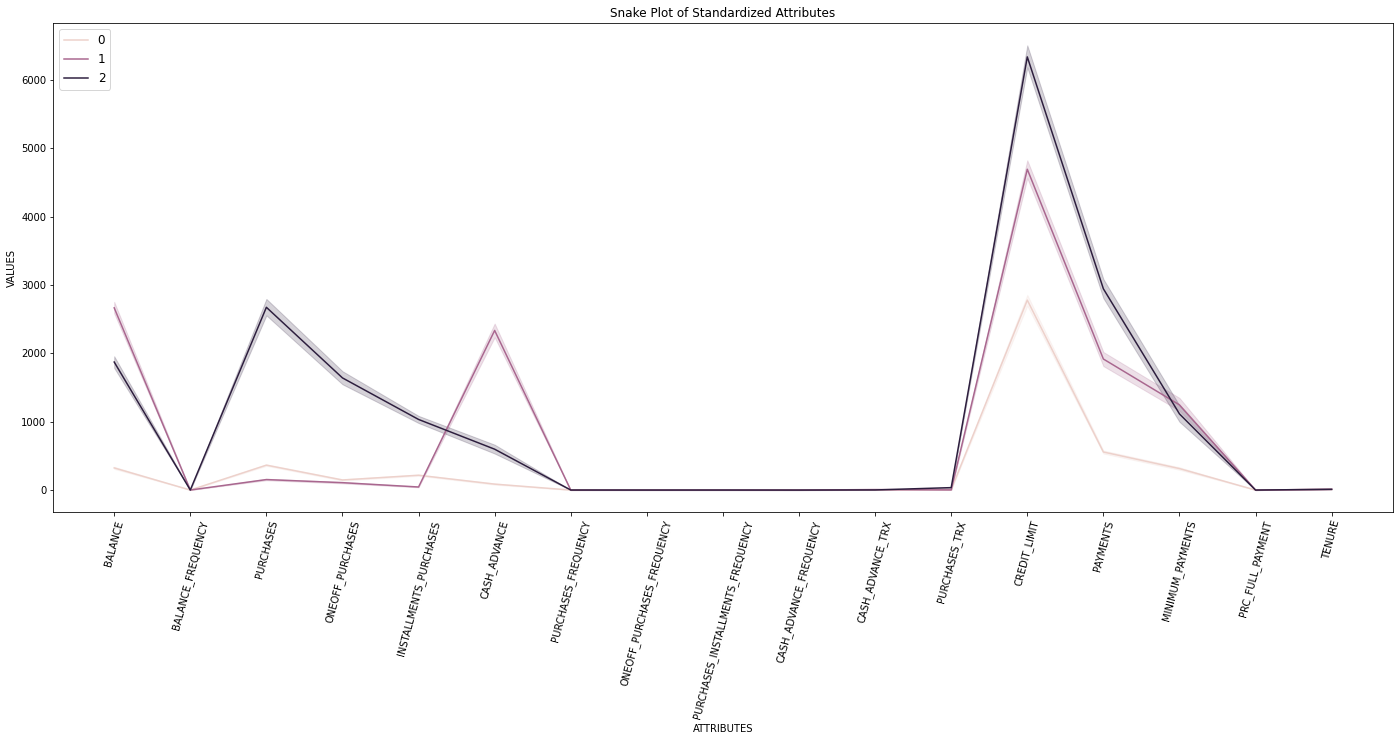

In [ ]:
datamart_melt = pd.melt(clusters.reset_index(),
id_vars=['cluster'],
value_vars=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
            'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
            'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
            'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 
            'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 
            'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
var_name='ATTRIBUTES',
value_name='VALUES')

plt.figure(figsize=(24, 9))
chart = sns.lineplot(x="ATTRIBUTES", y="VALUES", hue='cluster', data=datamart_melt)
plt.title('Snake Plot of Standardized Attributes')
plt.xticks(rotation=75)
plt.legend(loc='upper left', fontsize='large')

figure.tight_layout()

The relative importance of each feature is calculated as the mean of the clusters divided by the mean of the population mean minus 1. This calculation gives you a number relative to the cluster mean. The further the values is from 0 the more significant that feature is in relation to the total population.

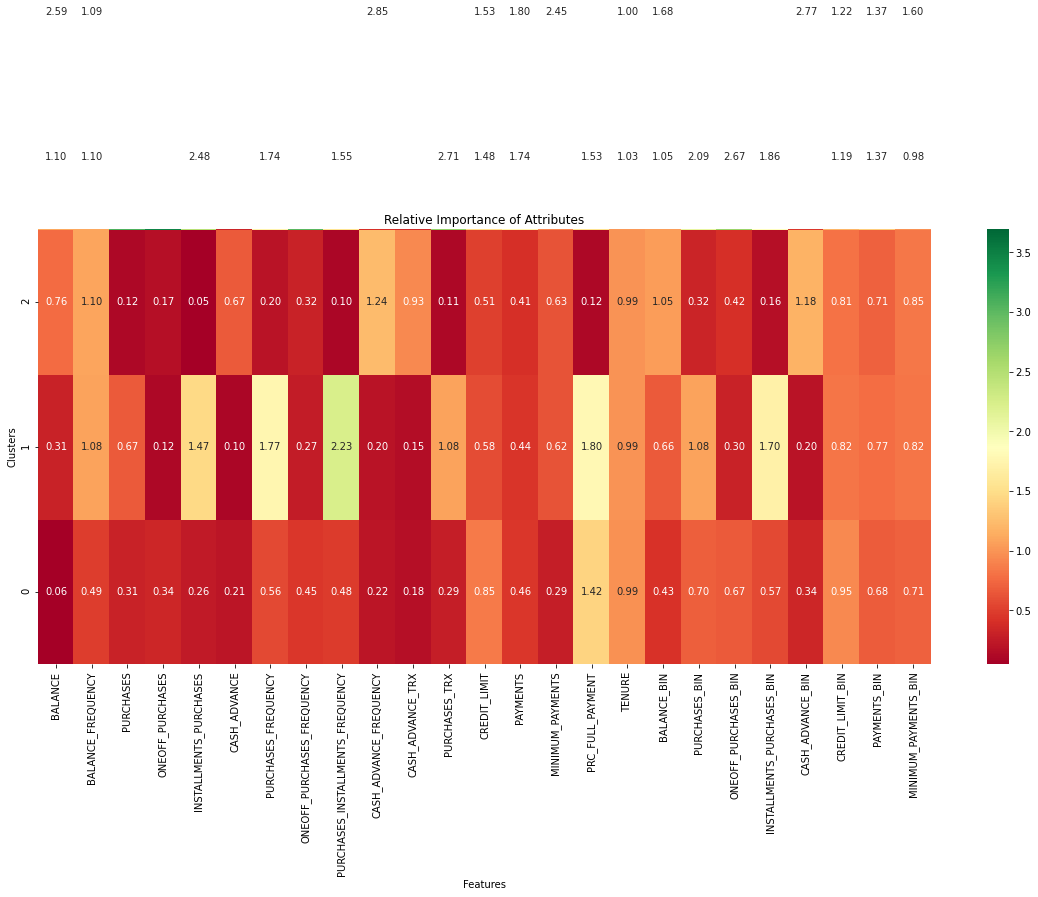

In [ ]:
cluster_avg = clusters.groupby(['cluster']).mean()
population_avg = clusters.mean()
population_avg = population_avg.drop('cluster')
relative_imp = cluster_avg/population_avg
relative_imp.sort_values(by=['cluster'],inplace=True)
relative_imp.round(2).unstack()

plt.figure(figsize=(20, 8))
plt.title('Relative Importance of Attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn', yticklabels='auto')
plt.ylim(0,3)
plt.xlabel('Features')
plt.ylabel('Clusters')
figure.tight_layout()
plt.savefig('kmeans_heat.png')
plt.show()

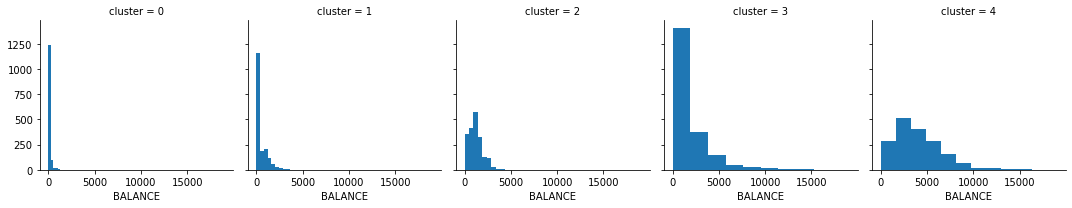

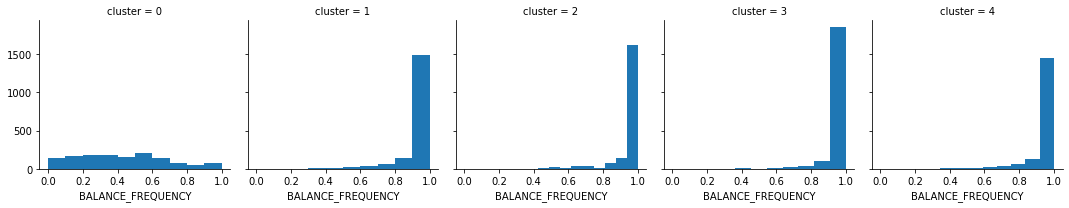

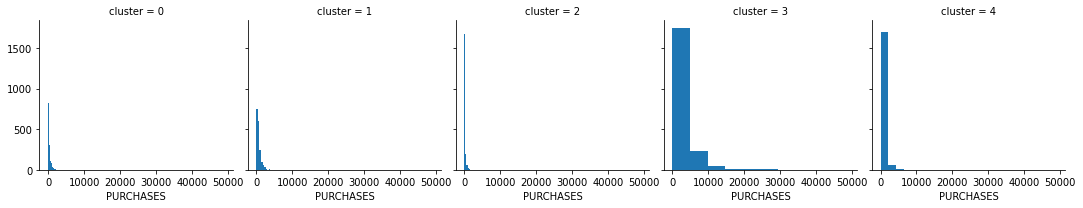

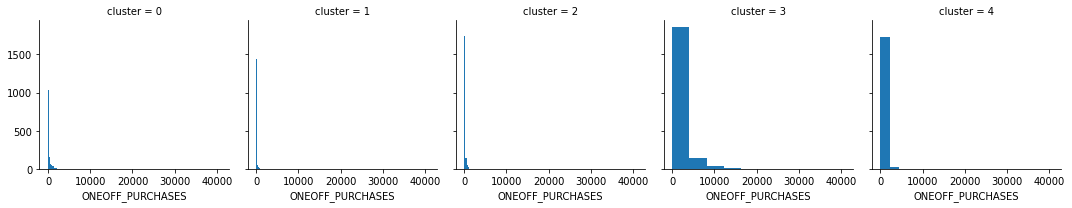

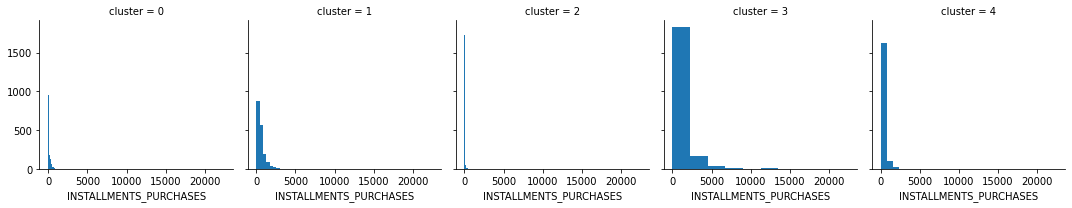

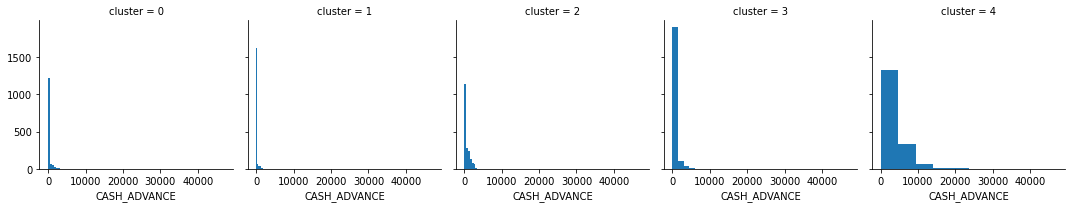

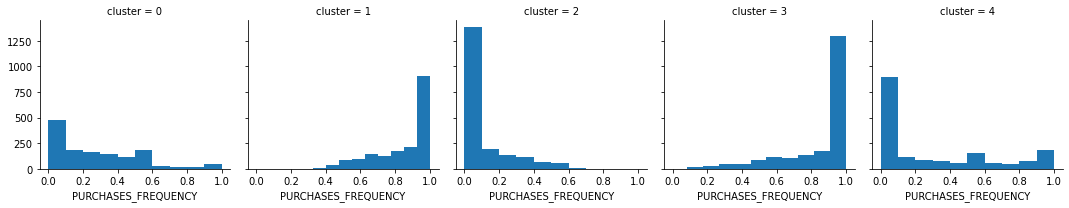

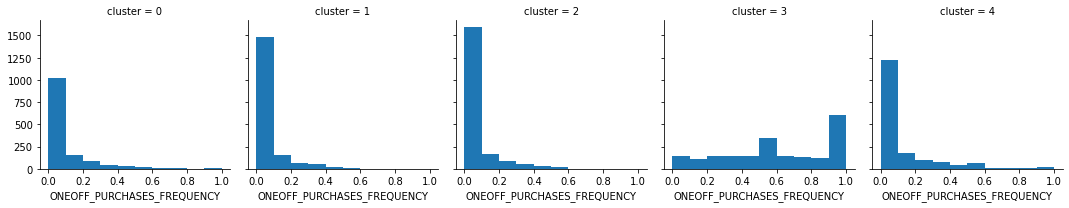

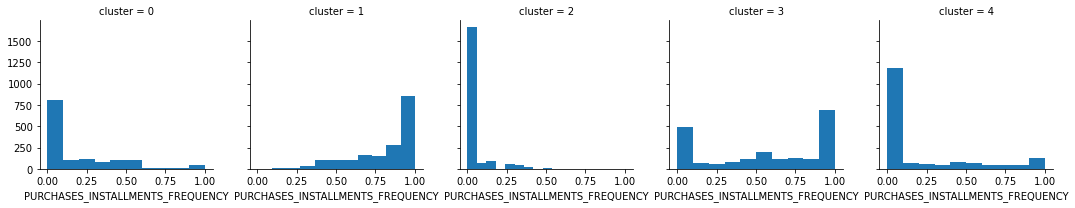

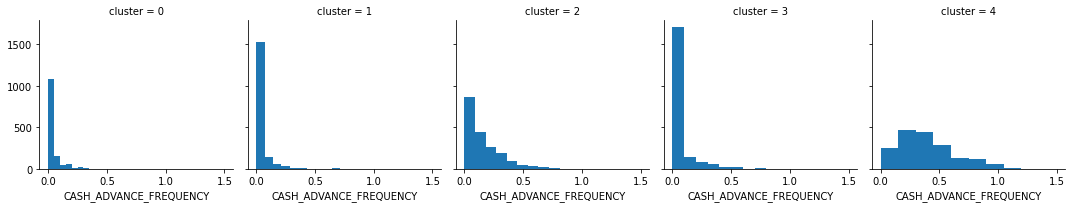

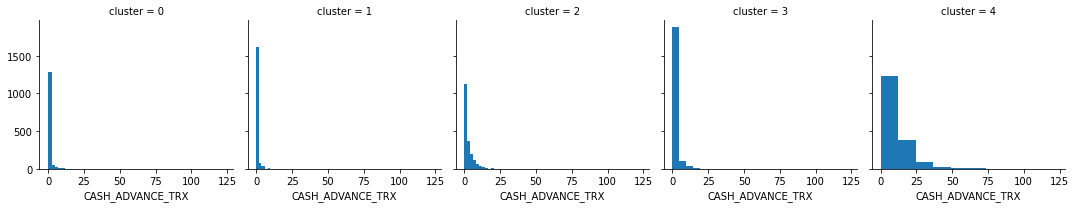

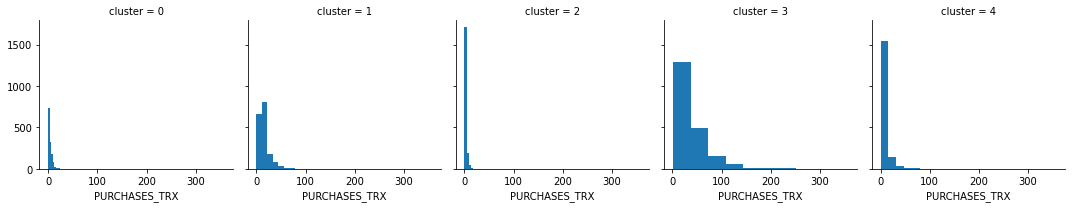

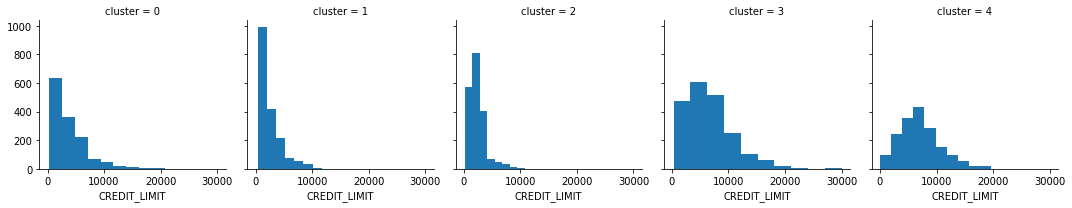

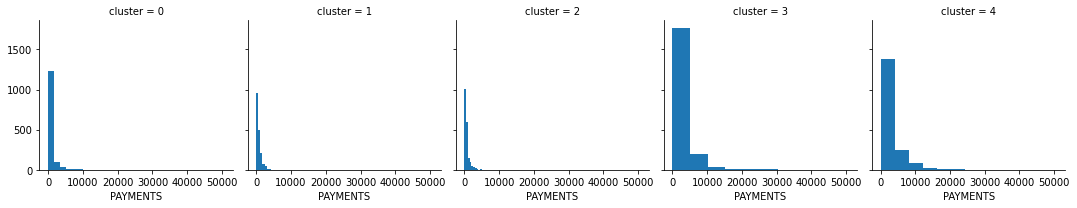

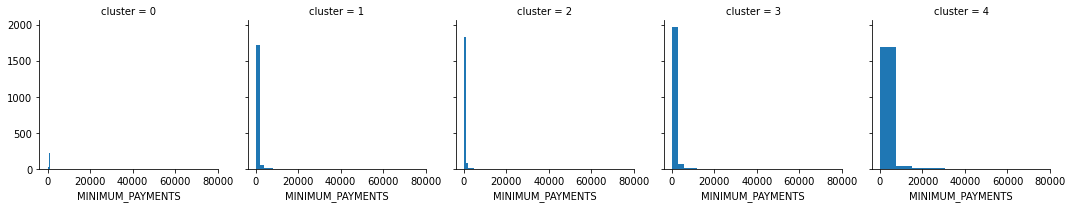

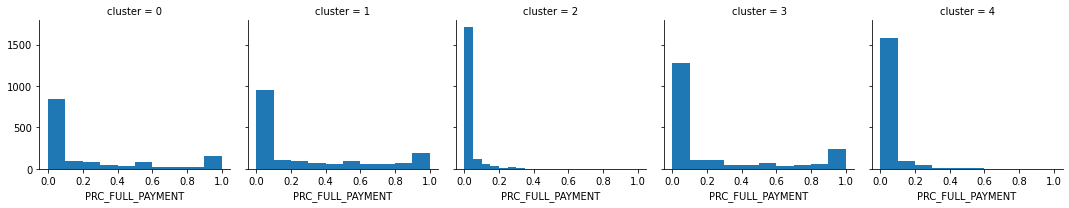

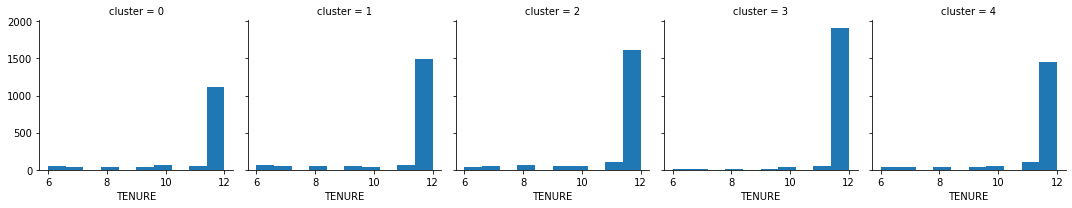

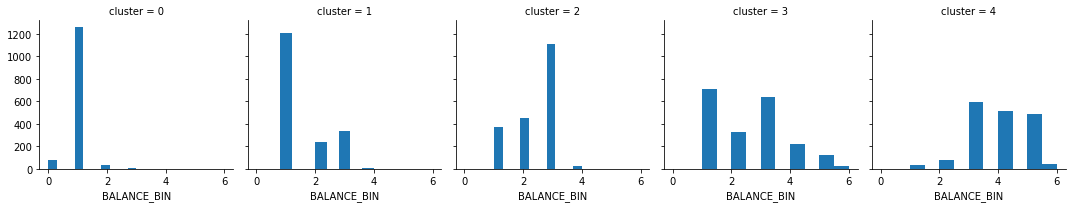

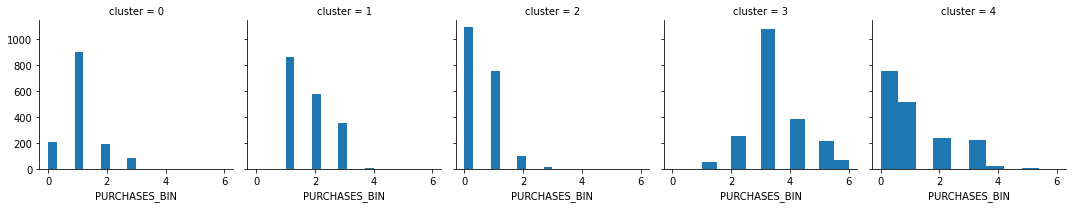

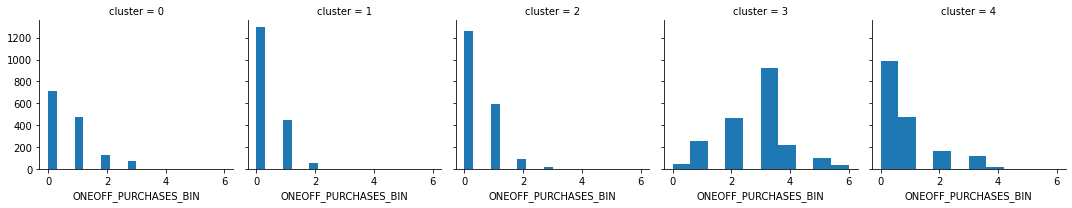

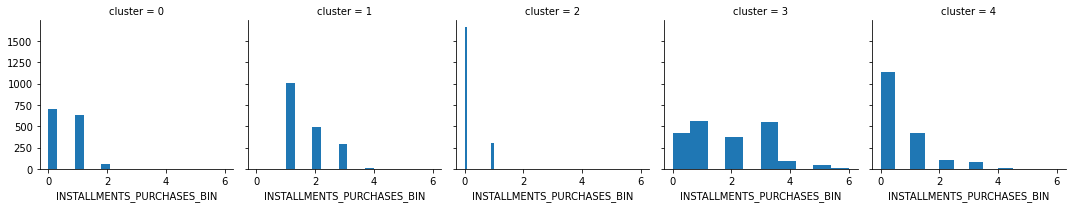

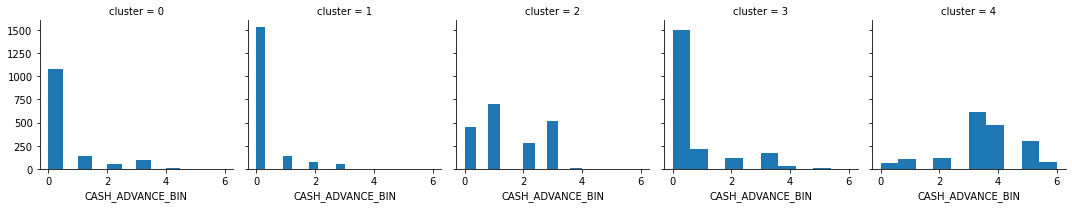

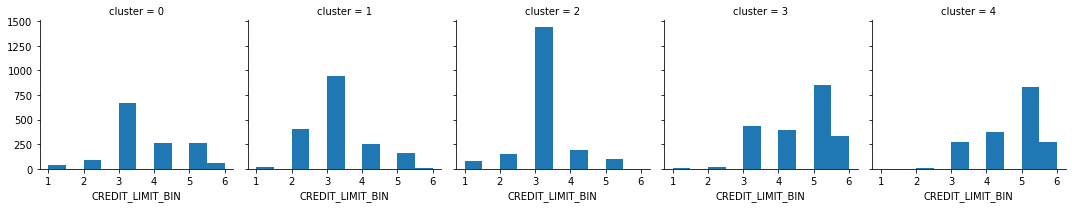

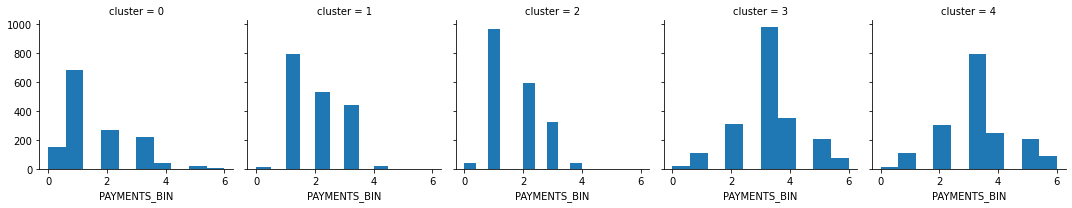

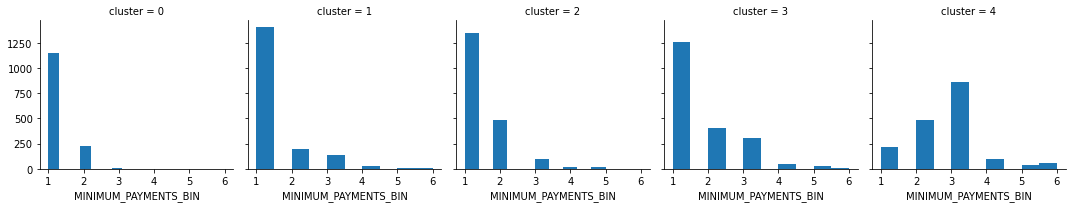

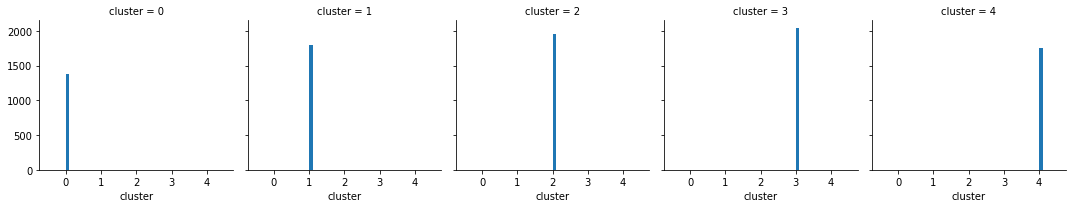

In [ ]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)    
    plt.show()

In [ ]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple'}

names = {0: 'Small-Med purchases', 
         1: 'People with due payments', 
         2: 'Credit Purchasers', 
         3: 'Take more cash in advance', 
         4: 'Expensive purchases',
         5:'Economical spenders'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(14, 7)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5)
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation")
plt.show()

NameError: ignored

Based on the data I would classify the three customer segments as follows:

Cluster 0: Balance is very high and gets updated frequently. Majority of purchases being done by paying cash in advance and it is being done quite frequently. Credit Limit is comparitively high. Minimum Payment done for the purchases are high compared to others

Cluster 1: Is the conservative credit card user with a preference for cash advances when necessary. Transactions occur infrequently and they only make minimum payments towards paying the balance off.

Cluster 3: Everyday credit card user for daily items. This segment of users uses their credit card less often than cluster 0 and does not use cash advances. Their credit limit is average and most make minimum payments only.

We can see how clusters are dense around the shape in the plot, taking a different side each. The higher up we go in the y-axis, the more credit these clusters are availing.

This document provides a way for financial institutes to cluster their individual credit customers into groups. As market needs evolve, the clusters in here may change accordingly. This clustering can result in beneficial input that can be used in targeting these customers within a marketing strategy and design services that fit their needs.

Other approaches:

As part of my analysis, I also compared the k-means approach and its handling of the data with Agglomerative and BIRCH Clustering approaches.

Agglomerative clustering is a form of hierarchical clustering. The agglomerative clustering method is also called a bottom-up method as opposed to k-means or k-center methods that are top-down. In a top-down method, a data set is divided into more and more clusters. In a bottom-up approach, all the data points are treated as individual clusters to start with and gradually merged into bigger and bigger clusters.

BIRCH (balanced iterative reducing and clustering using hierarchies) is a clustering algorithm that can cluster large datasets by first generating a small and compact summary of the the large dataset that retains as much information as possible. This smaller summary is then clustered instead of clustering the larger dataset.

All of the approaches seem to have a clear preference for 2 clusters. Based on the analysis of the K-Means results, I could see those two segments representing the extremes based on the total spend in association with purchase frequency, cash advances and the number and the amount of money spent on one-off purchases.

Per the snake plots it is very easy to see that all three approaches had a similar outcome and treatment of the data. The clusters are not mapped one to one but the visual is pretty telling.

In [ ]:
figure = plt.figure(figsize=(21, 7))
kmean_sil = figure.add_subplot(1,3,1) #kmean silhouette bar chart
birch_sil = figure.add_subplot(1,3,2) #birch chart
agg_sil = figure.add_subplot(1,3,3) #AgglomerativeClustering chart

kmean_silhouette_scores = [] 
birch_silhouette_scores = [] 
agg_silhouette_scores = [] 

for n_cluster in range(2, 8):
    kmean_silhouette_scores.append( 
        silhouette_score(normalized_df, KMeans(n_clusters = n_cluster).fit_predict(normalized_df))) 
    
    birch_silhouette_scores.append( 
        silhouette_score(normalized_df, Birch(n_clusters = n_cluster).fit_predict(normalized_df))) 
        
    agg_silhouette_scores.append( 
        silhouette_score(normalized_df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(normalized_df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
kmean_sil.bar(k, kmean_silhouette_scores) 
kmean_sil.set_title('K-MEANS: Number of Clusters vs. Silhouette Score', fontsize = 10)
kmean_sil.set_xlabel('Number of Clusters', fontsize = 20) 
kmean_sil.set_ylabel('Silhouette Score', fontsize = 20) 

birch_sil.bar(k, birch_silhouette_scores) 
birch_sil.set_title('BIRCH: Number of Clusters vs. Silhouette Score', fontsize = 10)
birch_sil.set_xlabel('Number of Clusters', fontsize = 20) 
birch_sil.set_ylabel('Silhouette Score', fontsize = 20) 
  
agg_sil.bar(k, agg_silhouette_scores) 
agg_sil.set_title('Agglomerative: Number of Clusters vs. Silhouette Score', fontsize = 10)
agg_sil.set_xlabel('Number of Clusters', fontsize = 20) 
agg_sil.set_ylabel('Silhouette Score', fontsize = 20)


figure.tight_layout()

Agglomerative Clustering

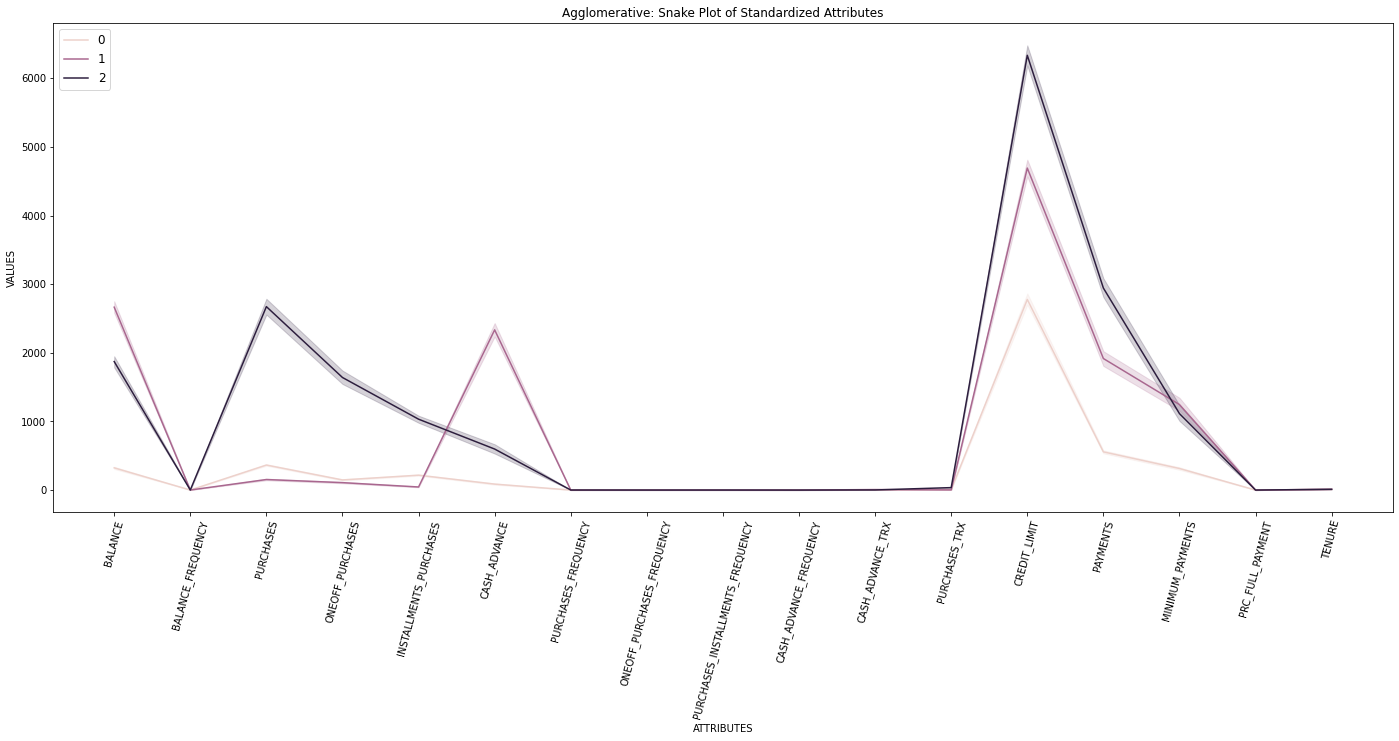

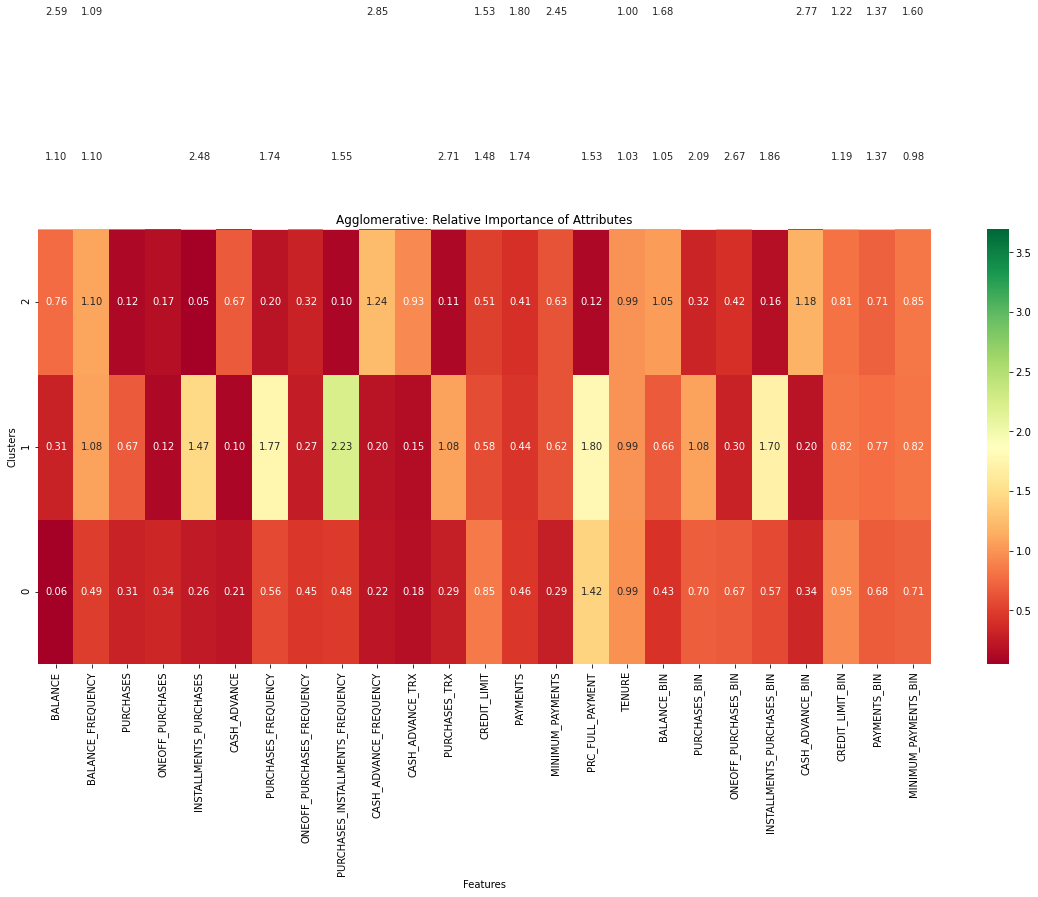

In [ ]:
# model fit with 3 clusters
agg_cluster= AgglomerativeClustering(n_clusters=3)
agg_cluster.fit(normalized_df)
agg_clusters=pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis=1)

# data prep for snake plot
datamart_melt = pd.melt(agg_clusters.reset_index(),
id_vars=['cluster'],
value_vars=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
            'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
            'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
            'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 
            'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 
            'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
var_name='ATTRIBUTES',
value_name='VALUES')

# Snakeplot
plt.figure(figsize=(24, 9))
chart = sns.lineplot(x="ATTRIBUTES", y="VALUES", hue='cluster', data=datamart_melt)
plt.title('Agglomerative: Snake Plot of Standardized Attributes')
plt.xticks(rotation=75)
plt.legend(loc='upper left', fontsize='large')

figure.tight_layout()

# relative importance heatmap
plt.figure(figsize=(20, 8))
plt.title('Agglomerative: Relative Importance of Attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn', yticklabels='auto')
plt.ylim(0,3)
plt.xlabel('Features')
plt.ylabel('Clusters')
figure.tight_layout()
plt.savefig('Agglomerative_heat.png')
plt.show()

BIRCH Clustering

In [ ]:
birch_cluster= Birch(n_clusters=3)
birch_cluster.fit(normalized_df)
labels=birch_cluster.labels_

birch_clusters=pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis=1)
birch_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,BALANCE_BIN,PURCHASES_BIN,ONEOFF_PURCHASES_BIN,INSTALLMENTS_PURCHASES_BIN,CASH_ADVANCE_BIN,CREDIT_LIMIT_BIN,PAYMENTS_BIN,MINIMUM_PAYMENTS_BIN,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1,1,0,1,0,2,1,1,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4,0,0,0,5,5,4,3,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3,2,2,0,0,5,2,2,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3,3,3,0,1,5,0,2,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2,1,1,0,0,3,2,1,1


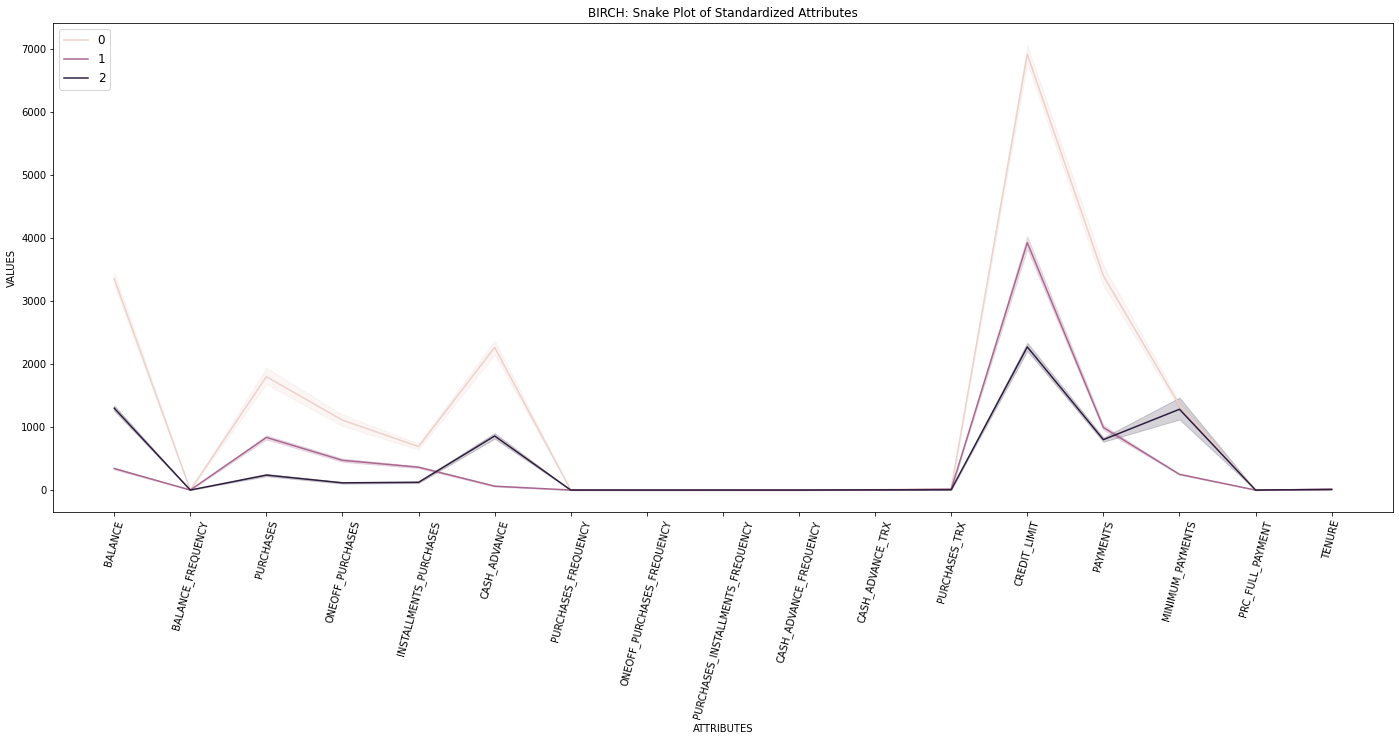

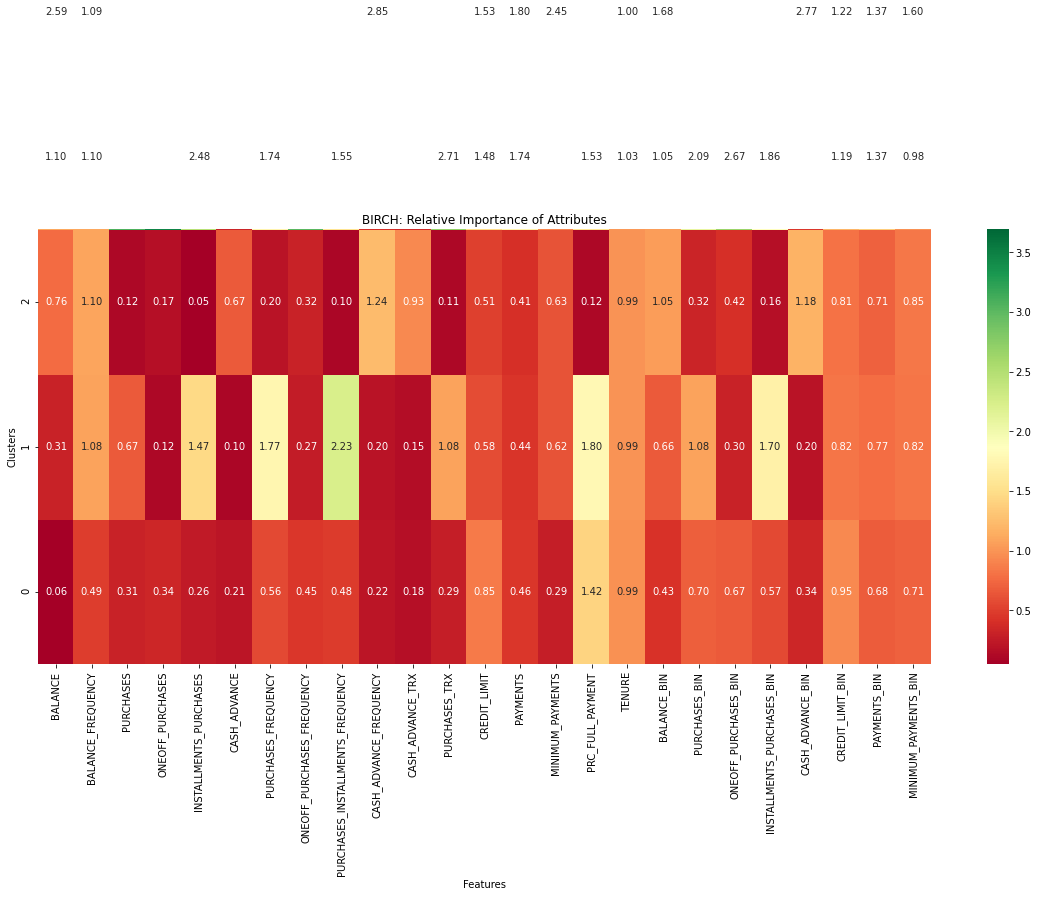

In [ ]:
# Prep data for snake plot
datamart_melt = pd.melt(birch_clusters.reset_index(),
id_vars=['cluster'],
value_vars=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
            'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
            'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
            'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 
            'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 
            'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
var_name='ATTRIBUTES',
value_name='VALUES')

#snakeplot
plt.figure(figsize=(24, 9))
chart = sns.lineplot(x="ATTRIBUTES", y="VALUES", hue='cluster', data=datamart_melt)
plt.title('BIRCH: Snake Plot of Standardized Attributes')
plt.xticks(rotation=75)
plt.legend(loc='upper left', fontsize='large')

figure.tight_layout()

## Relative Importance Heatmap
plt.figure(figsize=(20, 8))
plt.title('BIRCH: Relative Importance of Attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn', yticklabels='auto')
plt.ylim(0,3)
plt.xlabel('Features')
plt.ylabel('Clusters')
figure.tight_layout()
plt.savefig('kmeans_heat.png')
plt.show()

The reason that kMeans is most widely used in clustering may not be because it works every time, but probably due to its logical handling of data and logical output of clusters.

Although there are benefits to using other clustering algorithms. These benefits may not come to light in such a small project, but more in a constant effort where clustering is really needed, and variations of clustering would come in handy to solve more specific issues in grouping data points.

